In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

3scene/                         Leafify/                 Test2.jpg
Amazon_Rainforest.jpg           Leafify.ipynb            Test5.jpg
best_weight_scene_mobileNet.h5  Mulholland_Highway.jpg   Test6.jpg
British_Coast.jpg               nnmodel_scene/           Test8.jpg
ImageClassification_CNN.ipynb   Shopee_Challenge1.ipynb
ImageClassification_k-NN.ipynb  Test1.jfif


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

print("Loading dataset...")
imagePaths = paths.list_images("Leafify")
data = []
labels = []
print("Dataset import successful!")

Loading dataset...
Dataset import successful!


In [4]:
for img in imagePaths:
  image = Image.open(img)
  image = np.array(image.resize((200, 200)))/255.0
  data.append(image)
  
  label = img.split(os.path.sep)[-2]
  labels.append(label)

print(labels)

['Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8', 'Leaves8'

In [5]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [6]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 200, 200, 3)
(147, 200, 200, 3)


In [7]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(200,200,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [8]:
print("Training neural network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=32)

Training neural network...
Epoch 1/15
14/14 [==============================] - 10s 721ms/step - loss: 1.6213 - accuracy: 0.2177 - val_loss: 1.5996 - val_accuracy: 0.1905
Epoch 2/15
14/14 [==============================] - 10s 688ms/step - loss: 1.5751 - accuracy: 0.2766 - val_loss: 1.5298 - val_accuracy: 0.3333
Epoch 3/15
14/14 [==============================] - 10s 694ms/step - loss: 1.4505 - accuracy: 0.3628 - val_loss: 1.2868 - val_accuracy: 0.4354
Epoch 4/15
14/14 [==============================] - 10s 688ms/step - loss: 1.2560 - accuracy: 0.4535 - val_loss: 1.2653 - val_accuracy: 0.5646
Epoch 5/15
14/14 [==============================] - 10s 683ms/step - loss: 0.9281 - accuracy: 0.6508 - val_loss: 1.0028 - val_accuracy: 0.5986
Epoch 7/15
14/14 [==============================] - 10s 686ms/step - loss: 0.7823 - accuracy: 0.7029 - val_loss: 0.9946 - val_accuracy: 0.5850
Epoch 8/15
14/14 [==============================] - 10s 696ms/step - loss: 0.7011 - accuracy: 0.7029 - val_loss: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


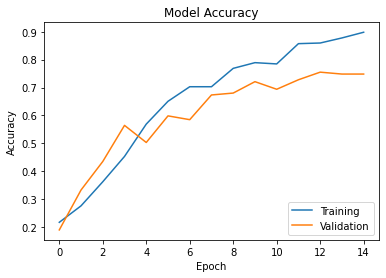

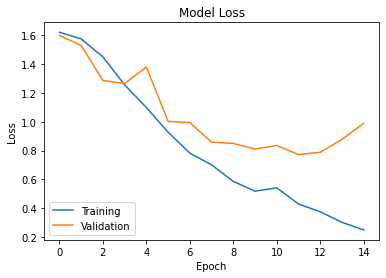

              precision    recall  f1-score   support

     Leaves1       0.95      0.62      0.75        34
     Leaves2       0.55      0.81      0.65        21
     Leaves5       0.80      0.90      0.85        31
     Leaves6       0.85      0.39      0.54        28
     Leaves8       0.72      1.00      0.84        33

    accuracy                           0.75       147
   macro avg       0.77      0.74      0.72       147
weighted avg       0.79      0.75      0.74       147



In [9]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

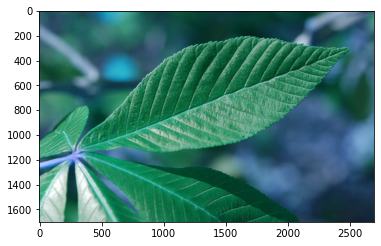

In [10]:
import cv2
import matplotlib.pyplot as plt

img='Test1.jfif'

img_array = cv2.imread(img)

plt.imshow(img_array)
plt.show()

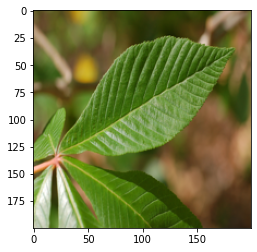

(1, 200, 200, 3)
[[9.5244400e-07 1.6679919e-03 6.4360388e-13 9.9833101e-01 2.4901896e-09]]
['Leaves6']


In [11]:
img_val = Image.open('Test1.jfif')
img_val = np.array(img_val.resize((200, 200))) / 255.0
img_val.shape
plt.imshow(img_val)
plt.show()

img_val = np.expand_dims(img_val, axis=0)
print(img_val.shape)

output = model1.predict(img_val, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])